# PYTHON PROJECT

# JANANI L

# Dataset:Bank_Personal_Loan_Modelling.csv

### 1. Import the required libraries and read the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [5]:
data.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4426,4427,33,8,140,95814,1,4.60,1,0,0,0,0,1,0
155,156,24,0,60,94596,4,1.60,1,0,0,0,0,1,0
4362,4363,28,2,55,93940,3,1.10,2,0,0,0,0,0,0
1958,1959,28,2,42,95762,1,1.50,1,0,0,0,0,1,1
1250,1251,47,20,81,94301,1,2.67,2,0,0,0,0,1,0


In [6]:
data.shape

(5000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the columns which you feel are redundant

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### 4. Display the Five Point Summary and write your key findings.


In [10]:
data.describe(include="all")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 5. There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint:.abs function)

In [11]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [12]:
data['Experience'] = data['Experience'].abs()

In [13]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

### 6. Get the target column distribution and comment on the class distribution.

In [14]:
data['Personal Loan'].unique()

array([0, 1], dtype=int64)

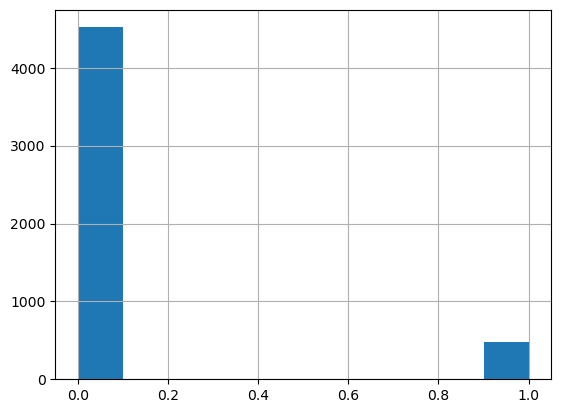

In [15]:
data['Personal Loan'].hist()
plt.show()

### 7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X variable.

In [16]:
data['CCAvg']= le.fit_transform(data['CCAvg'])

In [17]:
y = data[['Personal Loan']]
X = data.drop('Personal Loan',axis = 1)

In [18]:
y.shape

(5000, 1)

In [19]:
X.shape

(5000, 13)

### 8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the z-score scaling approach.

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state= 777)

In [21]:
X_train = ss.fit_transform(X_train)

In [22]:
X_test = ss.fit_transform(X_test)

In [23]:
X_test

array([[ 0.6807001 ,  1.01476306,  0.94613508, ..., -0.26438635,
         0.81083819, -0.62257857],
       [-0.5466719 ,  0.57924243,  0.50918846, ..., -0.26438635,
         0.81083819, -0.62257857],
       [ 1.0905094 , -0.98863183, -0.97643004, ...,  3.78234351,
         0.81083819, -0.62257857],
       ...,
       [ 1.52636009, -0.5531112 , -0.53948342, ...,  3.78234351,
         0.81083819,  1.60622298],
       [ 1.60448427, -1.33704833, -1.32598734, ..., -0.26438635,
         0.81083819, -0.62257857],
       [ 1.36874113,  1.45028369,  1.38308169, ..., -0.26438635,
        -1.23329169, -0.62257857]])

### 9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buying personal loans. Display the train and test accuracy scores.

In [24]:
lr.fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
LogisticRegression()

LogisticRegression()

In [26]:
y_pre= pd.DataFrame(lr.predict(X_train))

In [27]:
accuracy_score(y_train,y_pre)

0.952

In [28]:
y_test_pre = pd.DataFrame(lr.predict(X_test))

In [29]:
accuracy_score(y_test,y_test_pre)

0.948

### 10. Print the confusion matrix and classification report for the model and write your conclusions on the results

In [30]:
confusion_matrix(y_train,y_pre)

array([[3127,   45],
       [ 123,  205]], dtype=int64)

In [31]:
confusion_matrix(y_test,y_test_pre)

array([[1326,   22],
       [  56,   96]], dtype=int64)

In [32]:
classification_report(y_train,y_pre)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97      3172\n           1       0.82      0.62      0.71       328\n\n    accuracy                           0.95      3500\n   macro avg       0.89      0.81      0.84      3500\nweighted avg       0.95      0.95      0.95      3500\n'

In [33]:
classification_report(y_test,y_test_pre)

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97      1348\n           1       0.81      0.63      0.71       152\n\n    accuracy                           0.95      1500\n   macro avg       0.89      0.81      0.84      1500\nweighted avg       0.94      0.95      0.95      1500\n'